In [68]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score




In [7]:
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [8]:
from sklearn.tree import export_graphviz

export_graphviz(
  tree_clf,
  out_file="iris_tree.dot",
  feature_names=["petal length (cm)", "petal width (cm)"],
  class_names=iris.target_names,
  rounded=True,
  filled=True
)

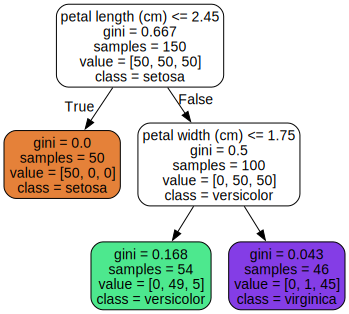

In [9]:
from graphviz import Source

Source.from_file("iris_tree.dot")

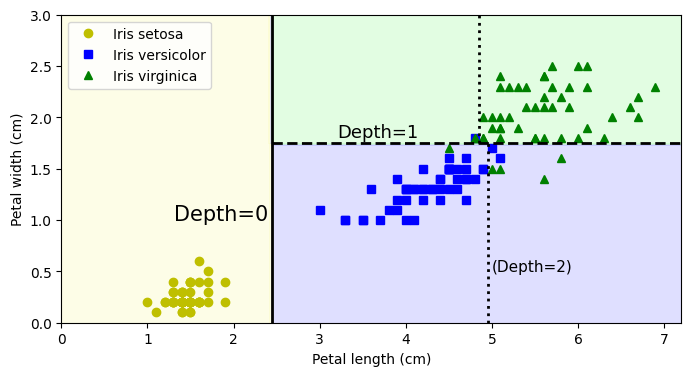

In [24]:
# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")
    
# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

Decision Trees and Regularization

In [31]:
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf_non_reg = DecisionTreeClassifier(random_state=42)
tree_clf_reg = DecisionTreeClassifier(random_state=42, min_samples_leaf=5)

tree_clf_non_reg.fit(X_moons, y_moons)
tree_clf_reg.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

Text(0.5, 1.0, 'Regularized tree split')

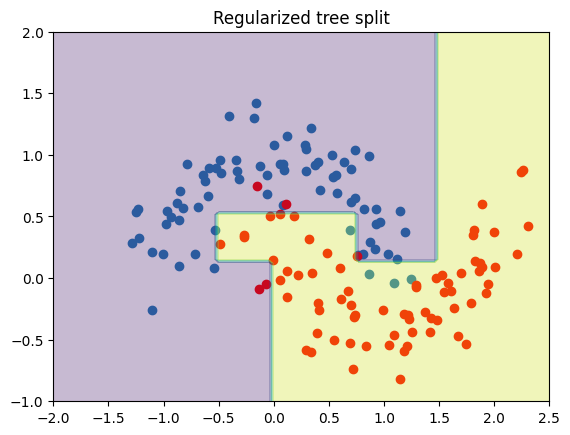

In [62]:
moons0 = X_moons[y_moons == 0]
moons1 = X_moons[y_moons == 1]

plt.scatter(moons0[:,0], moons0[:,1])
plt.scatter(moons1[:,0], moons1[:,1], color="red")

lengths, widths = np.meshgrid(np.linspace(-2, 2.5, 100), np.linspace(-1, 2, 100))
X_moons_all = np.c_[lengths.ravel(), widths.ravel()]

y_pred_reg = tree_clf_reg.predict(X_moons_all).reshape(lengths.shape)

plt.contourf(lengths, widths, y_pred_reg, alpha=0.3)
plt.title("Regularized tree split")

Text(0.5, 1.0, 'Non-Regularized tree split')

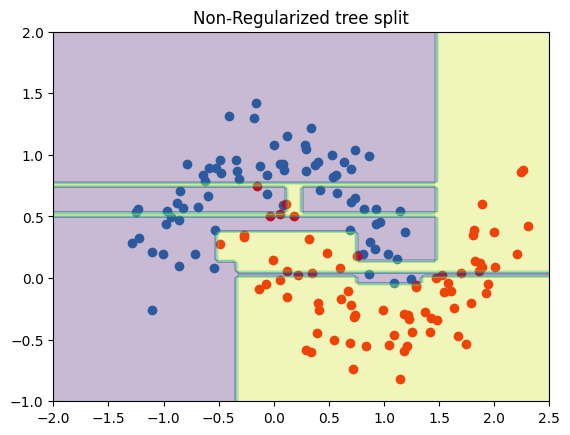

In [65]:
y_pred_non_reg = tree_clf_non_reg.predict(X_moons_all).reshape(lengths.shape)
plt.scatter(moons0[:,0], moons0[:,1])
plt.scatter(moons1[:,0], moons1[:,1], color="red")
plt.contourf(lengths, widths, y_pred_non_reg, alpha=0.3)
plt.title("Non-Regularized tree split")

Check models performance on new moon examples

In [67]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, random_state=101, noise=0.2)
y_pred_reg = tree_clf_reg.predict(X_moons_test)
y_pred_non_reg = tree_clf_non_reg.predict(X_moons_test)

In [70]:
print ("Reg model accuracy on test: ", accuracy_score(y_pred_reg, y_moons_test))
print ("Non reg model accuracy on test: ", accuracy_score(y_pred_non_reg, y_moons_test))


Reg model accuracy on test:  0.923
Non reg model accuracy on test:  0.917


# Decision Tree Regression

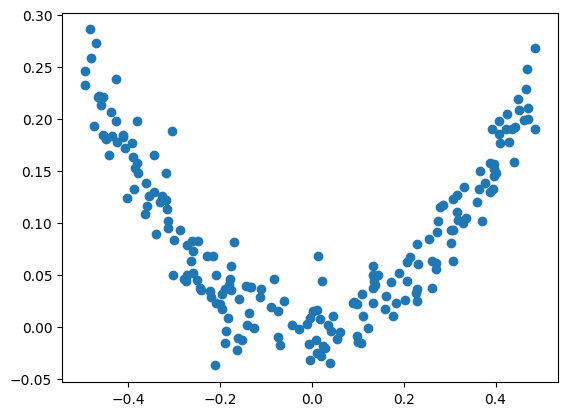

In [85]:
np.random.seed(42)

# Single random input feature
X_quad = np.random.rand(200,1) - 0.5

# Mock y values for regression
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

plt.scatter(X_quad, y_quad)

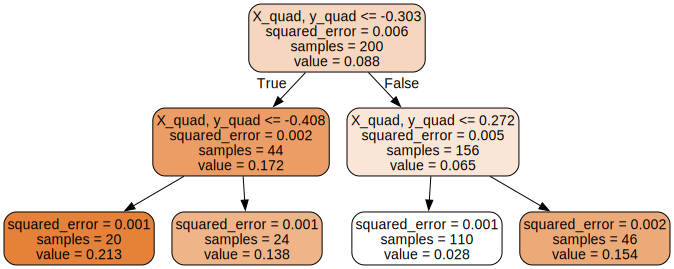

In [87]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg.fit(X_quad, y_quad)

export_graphviz(
  tree_reg,
  out_file="quad_reg_tree.dot",
  feature_names=["X_quad, y_quad"],
  rounded=True,
  filled=True
)

Source.from_file("quad_reg_tree.dot")

Regularization for decision tree regression

In [97]:
tree_reg = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_no_reg = DecisionTreeRegressor(random_state=42)

tree_reg.fit(X_quad, y_quad)
tree_no_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(random_state=42)

Text(0.5, 1.0, 'Regularized tree regression')

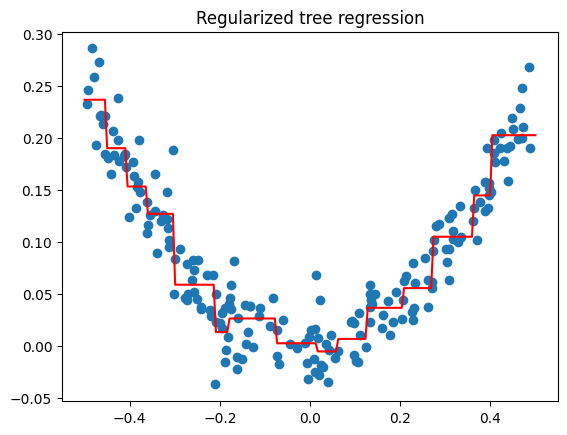

In [99]:
X_new = np.linspace(-0.5, 0.5, len(X_quad)).reshape(-1, 1)
y_pred_reg = tree_reg.predict(X_new)

plt.scatter(X_quad, y_quad)
plt.plot(X_new, y_pred_reg, color="red")
plt.title("Regularized tree regression")

Text(0.5, 1.0, 'Non-regularized tree regression')

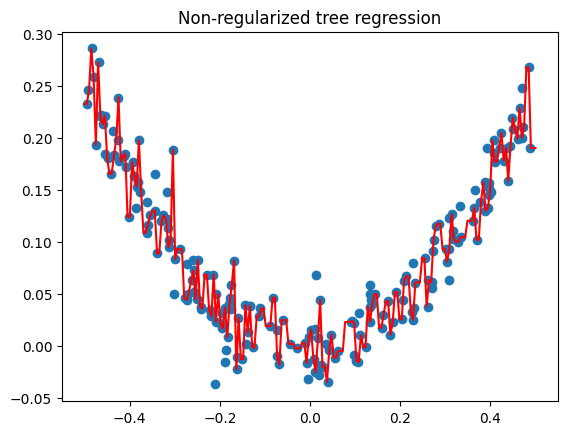

In [102]:
y_pred_non_reg = tree_no_reg.predict(X_new)

plt.scatter(X_quad, y_quad)
plt.plot(X_new, y_pred_non_reg, color="red")
plt.title("Non-regularized tree regression")

### Decision Trees and PCA

In [120]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import make_pipeline

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

pca_pipeline = make_pipeline(
  StandardScaler(),
  PCA()
)

X_iris_pca = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(random_state=42, max_depth=2)
tree_clf_pca.fit(X_iris_pca, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

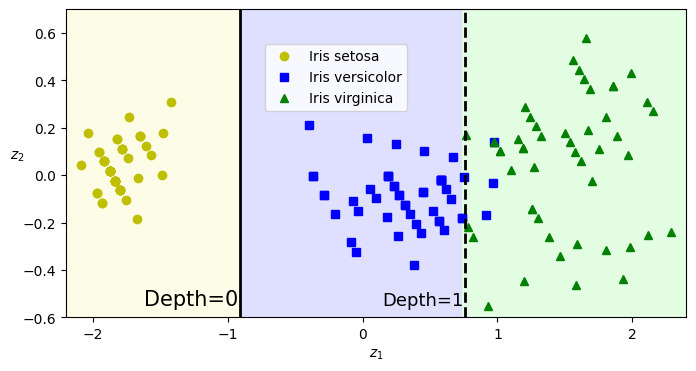

In [121]:
plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_pca[:, 0][y_iris == idx],
             X_iris_pca[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))

plt.show()